In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [364]:
pokemon = pd.read_csv('pokemon.csv')

In [365]:
pokemon.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


In [366]:
pokemon.shape

(800, 13)

## Single-class classification
### Goal: build a model to classify pokemons

In [367]:
def label_grass_type_pokemon (row):
    result = None
    if row['Type 1'] == 'Grass' or row['Type 2'] == 'Grass':
        result = 1
    else:
        result = 0 
    return result
    

In [368]:
pokemon['Grass Type'] = pokemon.apply(lambda row: label_grass_type_pokemon(row), axis=1)

In [369]:
pokemon.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Grass Type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0


In [370]:
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [371]:
pokemon['Grass Type'].sum()

95

In [372]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Grass Type'],
      dtype='object')

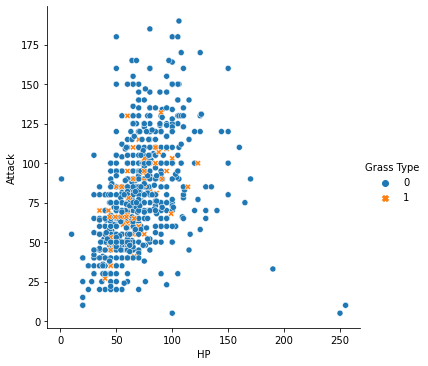

In [373]:
g=sns.relplot(x='HP',y='Attack',data=pokemon, hue='Grass Type',style='Grass Type')

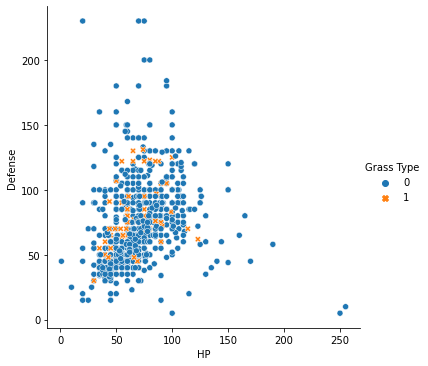

In [432]:
g=sns.relplot(x='HP',y='Defense',data=pokemon, hue='Grass Type',style='Grass Type')

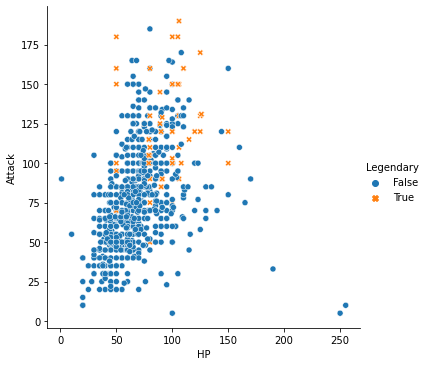

In [374]:
g=sns.relplot(x='HP',y='Attack',data=pokemon, hue='Legendary',style='Legendary')

#### Observations: 
* As you could see here, it is easier to classify legendary pokemons than classify grass type pokemons

In [375]:
pokemon.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Grass Type
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396,0.042845
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758,-0.052592
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620,-0.046120
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408,-0.062674
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377,-0.006948
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907,0.001312
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937,-0.005243
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715,-0.095578
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794,0.072716
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000,-0.066736


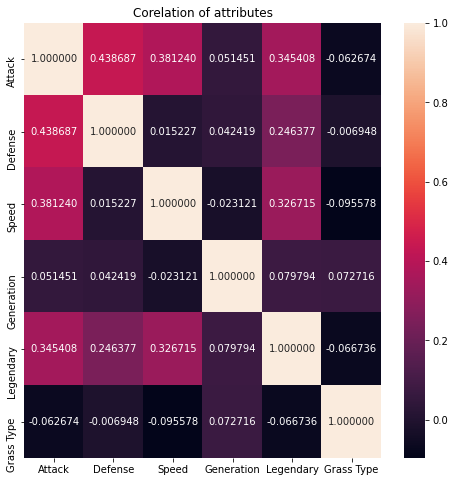

In [439]:
pokemon_attributes = pokemon[['Attack', 'Defense', 'Speed', 'Generation', 'Legendary', 'Grass Type']]
plt.subplots(figsize = (8,8))
sns.heatmap(pokemon_attributes.corr(),annot=True,fmt="f").set_title("Corelation of attributes")
plt.show()

Observations: 

* A pokemon's attack is positively correlated with defense and speed. 
* Grass type has little correlation with any of the attributes
* Generation also has little correlation with a pokemon's defense, attack, or speed
* Legendary has a relatively strong correlation with attack, defense, speed, and generation

### Setup
### Let's try to classify legendary pokemons

In [456]:
pokemon['Legendary'] = pokemon['Legendary'].astype(int)
X = pokemon.iloc[:, 4:10].values
Y = pokemon.iloc[:, -3].values

In [458]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [459]:
X_train

array([[490,  80, 105,  65, 100,  70],
       [700,  95, 145, 130, 120,  90],
       [500,  85, 110,  90,  45,  90],
       ...,
       [329,  50,  50,  62,  40,  62],
       [528, 110, 123,  65, 100,  65],
       [483,  89, 124,  80,  55,  80]], dtype=int64)

### Random forest

In [509]:
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced')
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

In [510]:
accuracy_rf=round(accuracy_score(Y_test,Y_prediction)* 100, 2)

In [511]:
accuracy_rf

95.0

In [512]:
print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (Y_test != Y_prediction).sum()))

Number of mislabeled points out of a total 240 points : 12


In [520]:
print(classification_report(Y_test, Y_prediction, target_names=["Legendary", "Not Legendary"]))

               precision    recall  f1-score   support

    Legendary       0.96      0.98      0.97       217
Not Legendary       0.79      0.65      0.71        23

     accuracy                           0.95       240
    macro avg       0.88      0.82      0.84       240
 weighted avg       0.95      0.95      0.95       240



In [514]:
tn, fp, fn, tp = confusion_matrix(Y_test,Y_prediction).ravel()

In [515]:
(tn, fp, fn, tp)

(213, 4, 8, 15)

In [526]:
def compare_two_lst(lst1, lst2):
    lst_index_mislabelled = [index for index, (first, second) in enumerate(zip(lst1, lst2)) if first!=second]        
    return lst_index_mislabelled

lst_index_mislabelled = compare_two_lst(Y_test, Y_prediction)

In [527]:
lst_index_mislabelled 

[13, 24, 61, 97, 110, 123, 136, 144, 176, 192, 203, 235]

In [584]:
X_test[13]

array([288,  50,  48,  43,  46,  41,  60], dtype=int64)

In [587]:
Y_prediction[61]

1

### GaussianNB

In [464]:
# train the model 
gnb = GaussianNB()
model = gnb.fit(X_train, Y_train)

In [465]:
y_pred = model.predict(X_test)

In [466]:
print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (Y_test != y_pred).sum()))

Number of mislabeled points out of a total 240 points : 18


### Complement NB

In [467]:
clf_complement = ComplementNB()
clf_complement_model = clf_complement.fit(X_train, Y_train)

y_pred_clf_complement = clf_complement_model.predict(X_test)

In [468]:
print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (Y_test != y_pred_clf_complement).sum()))

Number of mislabeled points out of a total 240 points : 94


### CategoricalNB

In [469]:
clf = CategoricalNB()
model = gnb.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (Y_test != y_pred).sum()))

Number of mislabeled points out of a total 240 points : 18


### Bionomial (Logistics Regression)

In [470]:
model = LogisticRegression()
model.fit(X_train, Y_train)
model.score(X_test,Y_test)

0.9333333333333333

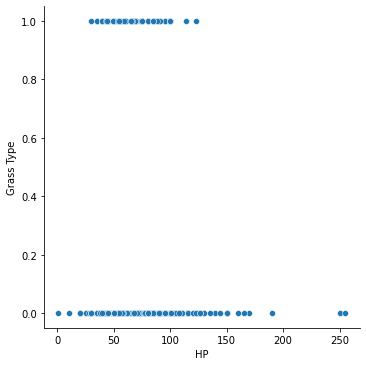

In [471]:
g=sns.relplot(x='HP',y='Grass Type',data=pokemon)

### KNeighbors

In [535]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

In [536]:
score_knn

96.25

### Neural Network

* solver: 
- ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.

- ‘sgd’ refers to stochastic gradient descent.

- ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

* hidden layer sizes: The ith element represents the number of neurons in the ith hidden layer


Source: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


In [537]:
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(6, 4), random_state=0)

clf.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(6, 4), random_state=0, solver='lbfgs')

In [538]:
result = clf.predict(X_test)

In [539]:
print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (Y_test != result).sum()))

Number of mislabeled points out of a total 240 points : 23


In [540]:
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## multi-class classification

#### Goal: classify grass type, water type, and fire type pokemon

In [541]:
def label_rare_pokemon(row):
    result = None
    if row['Type 1'] == 'Grass' and row['Type 2'] == 'Water':
        result = 1
    elif row['Type 1'] == 'Water' and row['Type 2'] == 'Grass':
        result = 2
    elif row['Type 1'] == 'Grass' and row['Type 2'] == 'Fire':
        result = 3
    elif row['Type 1'] == 'Fire' and row['Type 2'] == 'Grass':
        result = 4
    elif row['Type 1'] == 'Grass' and row['Type 2'] == 'Fire':
        result = 5
    elif row['Type 1'] == 'Fire' and row['Type 2'] == 'Water':
        result = 6
    elif row['Type 1'] == 'Water' and row['Type 2'] == 'Fire':
        result = 7
        
    return result

In [542]:
pokemon['Rare type'] = pokemon.apply(lambda row: label_rare_pokemon(row), axis=1)

In [543]:
pokemon['Rare type'].value_counts()

2.0    3
6.0    1
Name: Rare type, dtype: int64

In [544]:
pokemon.shape

(800, 15)

#### This shows there are three pokemon that are both "water" and "grass", and there is one pokemon that is both "fire" and "water"

In [545]:
pokemon_new = pokemon[pokemon['Rare type'].notnull()]

In [546]:
pokemon_new.head(4)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Grass Type,Rare type
293,270,Lotad,Water,Grass,220,40,30,30,40,50,30,3,0,1,2.0
294,271,Lombre,Water,Grass,340,60,50,50,60,70,50,3,0,1,2.0
295,272,Ludicolo,Water,Grass,480,80,70,70,90,100,70,3,0,1,2.0
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,1,0,6.0


#### We would want to exclude these pokemon from classification. 

In [547]:
pokemon_final = pokemon[pokemon['Rare type'].isna()]

In [548]:
pokemon_final.shape

(796, 15)

In [549]:
def label_three_pokemon_types(row):
    result = None
    if row['Type 1'] == 'Grass' or row['Type 2'] == 'Grass':
        result = 1
    elif row['Type 1'] == 'Water' or row['Type 2'] == 'Water':
        result = 2
    elif row['Type 1'] == 'Fire' or row['Type 2'] == 'Fire':
        result = 3
        
    return result

In [550]:
pokemon_final['Basic Type'] = pokemon_final.apply(lambda row: label_three_pokemon_types(row), axis=1)

C:\Users\lpeng\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [551]:
pokemon_final.dropna(subset = ["Basic Type"], inplace=True) # this data frame only contains fire, grass, water type pokemons. 

C:\Users\lpeng\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [552]:
pokemon_final.shape

(277, 16)

In [553]:
pokemon_final.groupby(['Basic Type']).count()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Grass Type,Rare type
Basic Type,,,,,,,,,,,,,,,
1.0,92,92,92,59,92,92,92,92,92,92,92,92,92,92,0
2.0,122,122,122,63,122,122,122,122,122,122,122,122,122,122,0
3.0,63,63,63,35,63,63,63,63,63,63,63,63,63,63,0


* There are 92 grass type pokemon, 122 water type pokemon, and 63 fire type pokemon in my dataset

In [554]:
X = pokemon_final.iloc[:, 4:11].values
Y = pokemon_final.iloc[:, -1].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [555]:
Y_train

array([2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 3., 1., 3., 1., 1., 2.,
       3., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 3., 3., 1., 1., 2.,
       1., 3., 2., 3., 1., 1., 3., 1., 2., 1., 2., 1., 3., 3., 2., 2., 3.,
       3., 1., 2., 2., 1., 2., 3., 2., 2., 3., 3., 2., 1., 1., 2., 2., 2.,
       2., 1., 2., 2., 3., 3., 1., 2., 3., 2., 1., 2., 1., 1., 1., 1., 2.,
       2., 2., 3., 2., 3., 2., 2., 1., 2., 2., 1., 3., 1., 3., 1., 1., 2.,
       3., 3., 2., 2., 1., 3., 2., 2., 2., 2., 2., 2., 1., 3., 3., 1., 2.,
       3., 2., 2., 2., 1., 2., 3., 2., 1., 2., 1., 2., 3., 1., 1., 3., 3.,
       2., 1., 1., 1., 3., 1., 3., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2.,
       1., 1., 2., 2., 1., 2., 1., 3., 3., 1., 2., 1., 2., 2., 2., 2., 2.,
       1., 1., 2., 1., 2., 2., 2., 2., 3., 2., 2., 1., 2., 3., 1., 2., 2.,
       2., 1., 2., 2., 1., 3., 1., 1., 2., 1., 3., 1., 2., 1., 2., 2., 1.,
       2., 1., 1., 2., 3., 3., 2., 2., 3., 2., 2., 1., 3., 1., 1., 2., 2.])

In [556]:
def CountFrequency(array):
    my_list = list(array)
     
    # Creating an empty dictionary
    freq = {}
    for items in my_list:
        freq[items] = my_list.count(items)
     
    for key, value in freq.items():
        print ("% d : % d"%(key, value))

In [557]:
CountFrequency(Y_train)

 2 :  99
 1 :  78
 3 :  44


In [558]:
CountFrequency(Y_test)

 1 :  14
 2 :  23
 3 :  19


### Multinomial NB

In [559]:
clf = MultinomialNB()
clf.fit(X_train, Y_train)

MultinomialNB()

In [560]:
result = clf.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (Y_test != result).sum()))

Number of mislabeled points out of a total 56 points : 30


In [561]:
result

array([3., 1., 2., 1., 1., 2., 3., 2., 3., 1., 3., 1., 3., 2., 1., 3., 3.,
       2., 3., 3., 3., 3., 3., 1., 3., 2., 2., 1., 3., 1., 3., 1., 3., 2.,
       1., 1., 1., 3., 3., 2., 2., 3., 1., 1., 1., 2., 3., 3., 2., 3., 3.,
       2., 3., 2., 3., 2.])

In [562]:
Y_test

array([1., 2., 2., 1., 2., 3., 2., 1., 2., 1., 2., 2., 3., 2., 2., 2., 3.,
       2., 3., 3., 3., 3., 3., 2., 3., 2., 1., 2., 3., 2., 1., 1., 3., 1.,
       3., 3., 2., 2., 3., 1., 2., 3., 3., 2., 1., 1., 3., 3., 2., 2., 2.,
       1., 1., 1., 3., 2.])

### Want to design a function to find the difference in two lists

In [563]:
def find_diff_in_lst(result, Y_test):
    mylist = []
    for index, item in enumerate(result):
        if item != Y_test[index]:
            mylist.append({index:item})

In [564]:
find_diff_in_lst(result, Y_test)

### KNeighbor

In [565]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)

result = neigh.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (Y_test != result).sum()))

Number of mislabeled points out of a total 56 points : 37


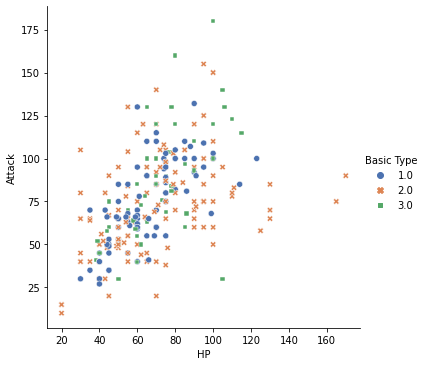

In [566]:
g=sns.relplot(x='HP',y='Attack',data=pokemon_final, hue='Basic Type',style='Basic Type', palette="deep")

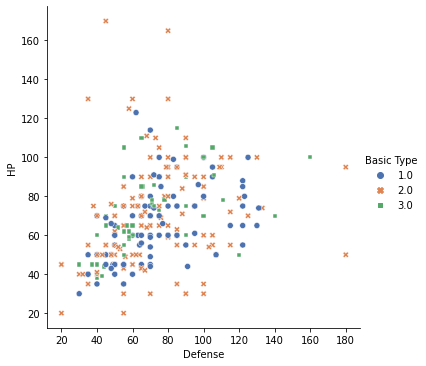

In [567]:
g=sns.relplot(x='Defense',y='HP',data=pokemon_final, hue='Basic Type',style='Basic Type', palette="deep")

In [568]:
result

array([2., 1., 3., 2., 1., 2., 3., 1., 1., 1., 2., 1., 3., 2., 1., 2., 1.,
       2., 2., 3., 1., 2., 3., 1., 3., 1., 1., 1., 1., 3., 3., 2., 1., 1.,
       2., 2., 1., 1., 3., 2., 1., 3., 1., 1., 1., 3., 2., 2., 3., 3., 2.,
       1., 2., 2., 3., 2.])

### Neural network

In [569]:
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 3), random_state=0)

clf.fit(X_train, Y_train)

result = clf.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (Y_test != result).sum()))

result

Number of mislabeled points out of a total 56 points : 33


array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.])

In [570]:
Y_test

array([1., 2., 2., 1., 2., 3., 2., 1., 2., 1., 2., 2., 3., 2., 2., 2., 3.,
       2., 3., 3., 3., 3., 3., 2., 3., 2., 1., 2., 3., 2., 1., 1., 3., 1.,
       3., 3., 2., 2., 3., 1., 2., 3., 3., 2., 1., 1., 3., 3., 2., 2., 2.,
       1., 1., 1., 3., 2.])

In [571]:
result

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.])

### Decision tree

In [588]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, Y_train)
#tree.plot_tree(clf)

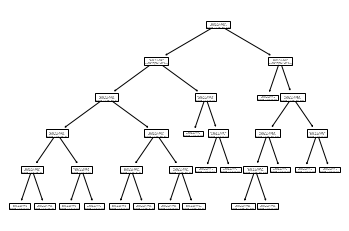

In [589]:
plt.figure()
plt.figsize=(30,10)
tree.plot_tree(clf)
plt.show()

In [590]:
result = clf.predict(X_test)

In [591]:
print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (Y_test != result).sum()))

Number of mislabeled points out of a total 56 points : 28


In [592]:
result

array([3., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 3., 1., 2., 2., 1.,
       2., 3., 3., 1., 3., 2., 2., 2., 2., 2., 1., 3., 1., 3., 1., 3., 1.,
       2., 2., 1., 2., 3., 1., 2., 3., 2., 2., 1., 2., 3., 1., 3., 3., 3.,
       2., 3., 2., 2., 2.])

In [593]:
Y_test

array([1., 2., 2., 1., 2., 3., 2., 1., 2., 1., 2., 2., 3., 2., 2., 2., 3.,
       2., 3., 3., 3., 3., 3., 2., 3., 2., 1., 2., 3., 2., 1., 1., 3., 1.,
       3., 3., 2., 2., 3., 1., 2., 3., 3., 2., 1., 1., 3., 3., 2., 2., 2.,
       1., 1., 1., 3., 2.])

### Random forest

In [598]:
forest = RandomForestClassifier(n_estimators=100, random_state=2, class_weight='balanced', min_samples_split=5)

forest.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       random_state=2)

In [599]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_train, Y_train)))

Accuracy on training set: 0.973
Accuracy on test set: 0.973


In [601]:
forest_sub = forest.estimators_[0]

In [610]:
X_train[0]

array([305,  62,  44,  50,  44,  50,  55], dtype=int64)

In [618]:
Y_train

array([2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 3., 1., 3., 1., 1., 2.,
       3., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 3., 3., 1., 1., 2.,
       1., 3., 2., 3., 1., 1., 3., 1., 2., 1., 2., 1., 3., 3., 2., 2., 3.,
       3., 1., 2., 2., 1., 2., 3., 2., 2., 3., 3., 2., 1., 1., 2., 2., 2.,
       2., 1., 2., 2., 3., 3., 1., 2., 3., 2., 1., 2., 1., 1., 1., 1., 2.,
       2., 2., 3., 2., 3., 2., 2., 1., 2., 2., 1., 3., 1., 3., 1., 1., 2.,
       3., 3., 2., 2., 1., 3., 2., 2., 2., 2., 2., 2., 1., 3., 3., 1., 2.,
       3., 2., 2., 2., 1., 2., 3., 2., 1., 2., 1., 2., 3., 1., 1., 3., 3.,
       2., 1., 1., 1., 3., 1., 3., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2.,
       1., 1., 2., 2., 1., 2., 1., 3., 3., 1., 2., 1., 2., 2., 2., 2., 2.,
       1., 1., 2., 1., 2., 2., 2., 2., 3., 2., 2., 1., 2., 3., 1., 2., 2.,
       2., 1., 2., 2., 1., 3., 1., 1., 2., 1., 3., 1., 2., 1., 2., 2., 1.,
       2., 1., 1., 2., 3., 3., 2., 2., 3., 2., 2., 1., 3., 1., 1., 2., 2.])

<Figure size 432x288 with 0 Axes>

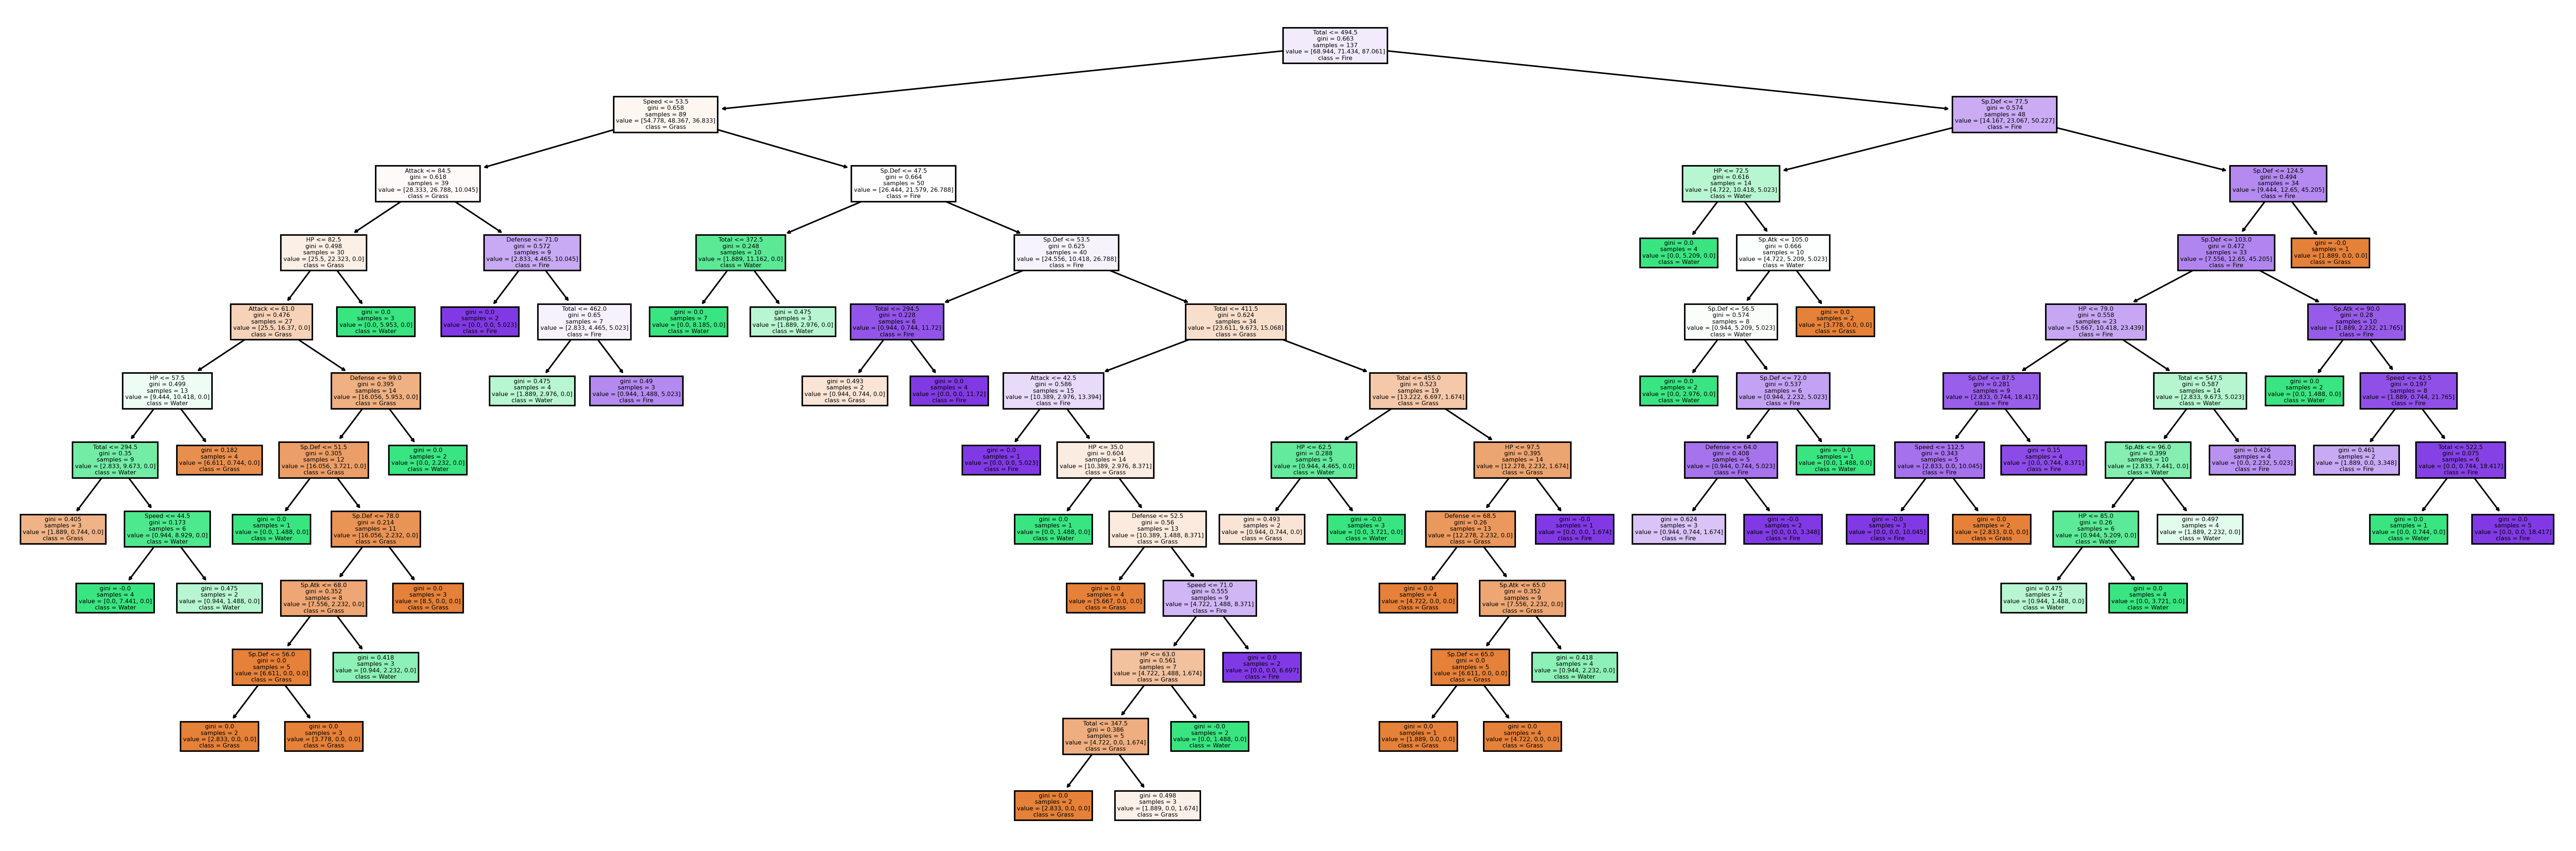

In [619]:
plt.figure()
plt.figsize=(30,10)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,10), dpi=300)
cn=['Not Legendary', 'Legendary']
tree.plot_tree(forest_sub, filled=True, feature_names=['Total', 'HP','Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed'], class_names=['Grass', 'Water', 'Fire'])
plt.show()
fig.savefig('subtree.png')

In [620]:
tree.export_graphviz(forest_sub, out_file='subtree.dot')

In [608]:
X_train

array([[305,  62,  44, ...,  44,  50,  55],
       [325,  65,  45, ...,  45,  70,  45],
       [294,  50,  50, ...,  50,  40,  64],
       ...,
       [480,  90, 100, ...,  90,  60,  80],
       [440,  55,  65, ...,  95,  45,  85],
       [325,  76,  48, ...,  57,  62,  34]], dtype=int64)